In [73]:
from src.mediator import Mediator
from src.inout import InOuter
from src.model import Model
from src.analysis import Analyzer
from src.processing import Processor
from matplotlib import pyplot as plt
from src.utils.random_generator import RandomGeneratorType, NormalGenerator, CustomGenerator, UniformGenerator
from src.utils.math_functions import FuncType
from src.utils.fourier_transform import RectangularWindow
from src.utils.statistics import std, var


import numpy as np

In [74]:
model = Model()
analyzer = Analyzer()
processor = Processor()
inout = InOuter()

{'rate': 11025, 'data': array([-14, -13, -11, ...,  12,  10,   7], dtype=int16), 'N': 10240}


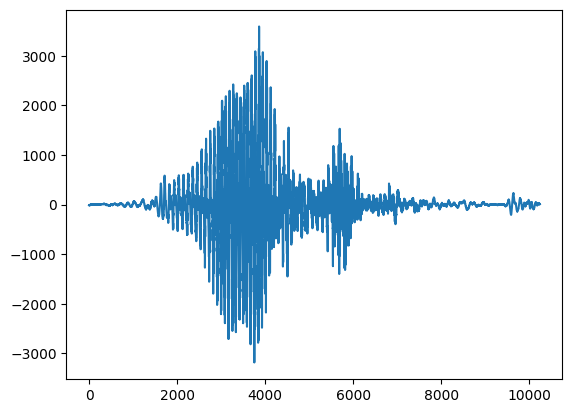

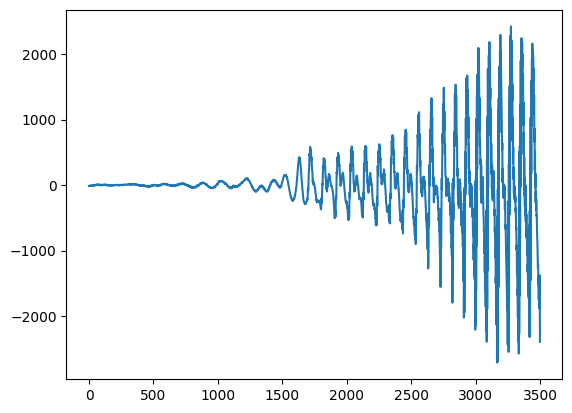

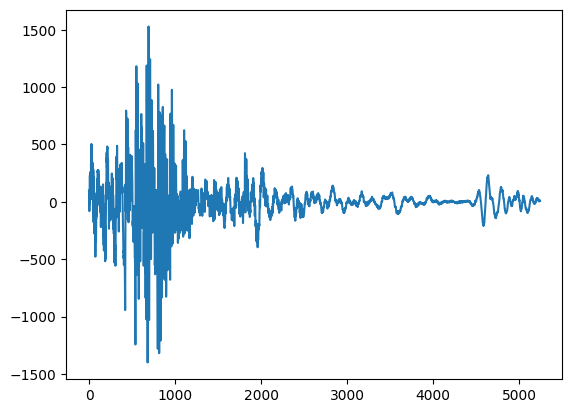

In [81]:
data = inout.read_wav('data/' + 'word_9.wav')
print(data)


rate = data['rate']
first = data['data'][:4300]
second = data['data'][4500:]
dt = 1/rate

plt.plot(data['data'], c='tab:blue')
plt.show()

plt.plot(first, c='tab:blue')
plt.show()

plt.plot(second, c='tab:blue')
plt.show()


In [76]:
full_word_amp = analyzer.fourier(data['data'], len(data['data']))[2]
plt.plot(*analyzer.spectre_f(full_word_amp, dt), c='tab:blue')
plt.show()

first_amp = analyzer.fourier(first, len(first))[2]
plt.plot(*analyzer.spectre_f(first_amp, dt), c='tab:blue')
plt.show()

second_amp = analyzer.fourier(second, len(second))[2]
plt.plot(*analyzer.spectre_f(second_amp, dt), c='tab:blue')
plt.show()

KeyboardInterrupt: 

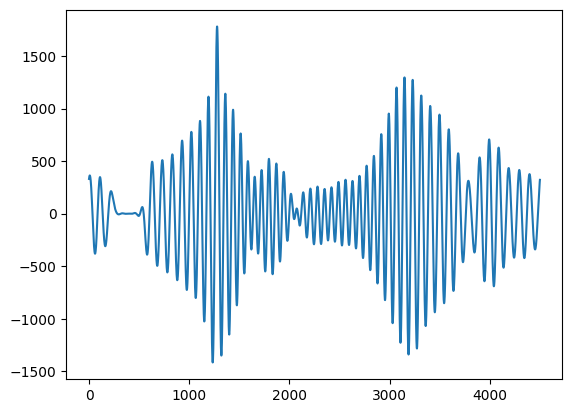

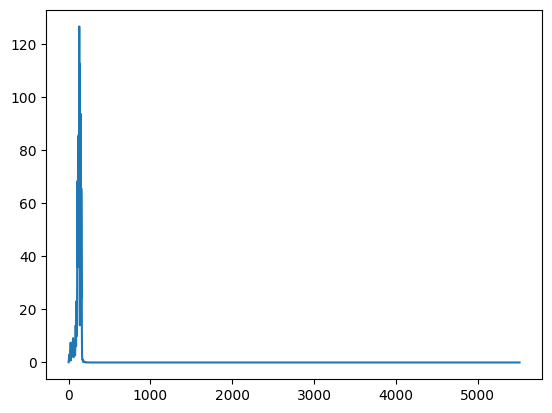

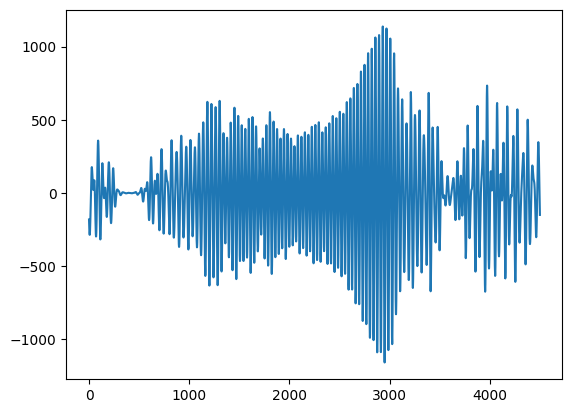

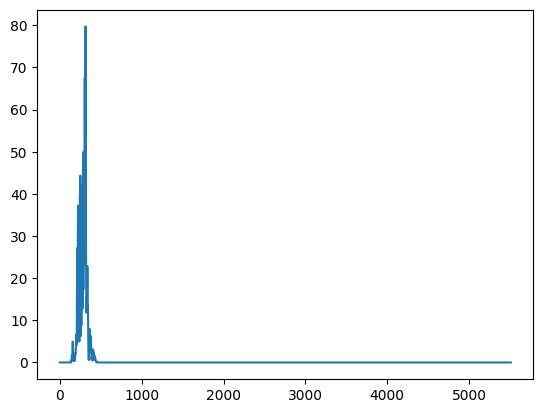

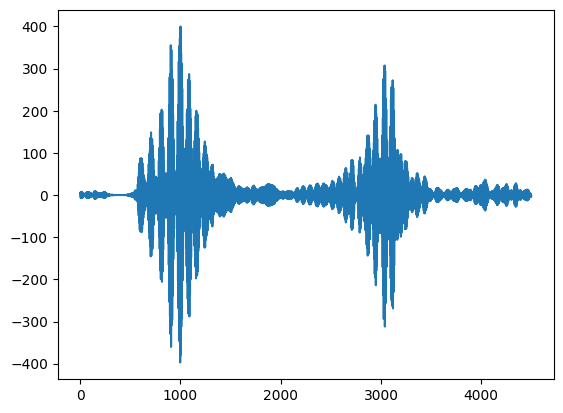

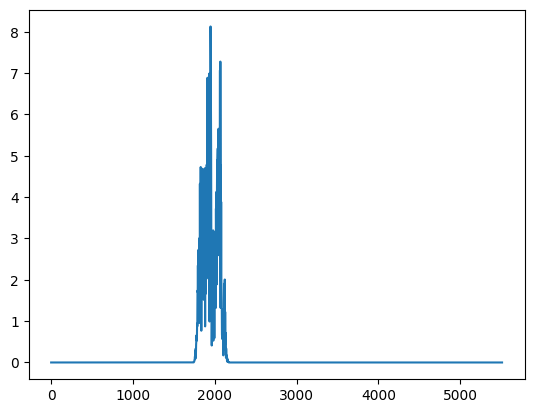

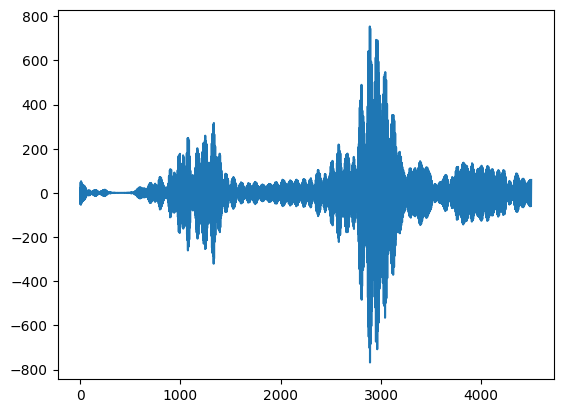

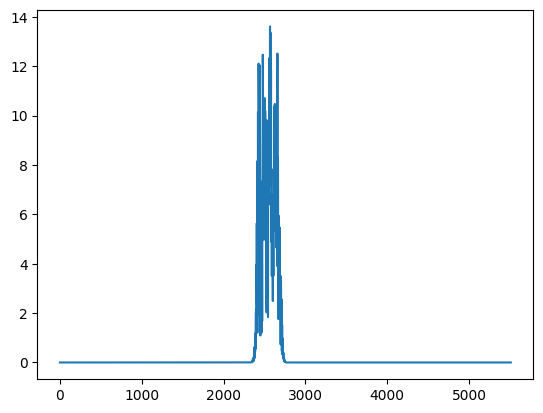

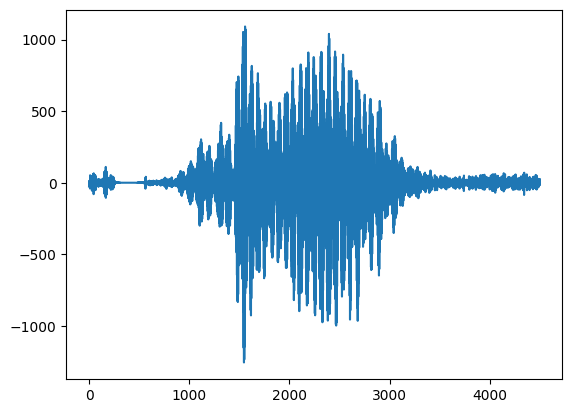

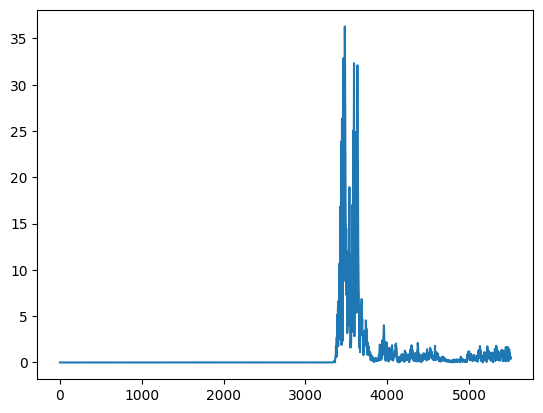

In [ ]:

data = first
m = 254

lpf_1 = processor.reflect_lpf(processor.lpf(150, dt, m))
bpf_2 = processor.bpf(200, 400, dt, m)
bpf_3 = processor.bpf(1800, 2100, dt, m)
bpf_4 = processor.bpf(2400, 2700, dt, m)
hpf_5 = processor.hpf(3400, dt, m)

convol_lpf_1 = model.convolModel(data, len(data), lpf_1, 2*m+1)
convol_hpf_5 = model.convolModel(data, len(data), hpf_5, 2*m+1)
convol_bpf_2 = model.convolModel(data, len(data), bpf_2, 2*m+1)
convol_bpf_3 = model.convolModel(data, len(data), bpf_3, 2*m+1)
convol_bpf_4 = model.convolModel(data, len(data), bpf_4, 2*m+1)


convol_lpf_amp_1 = analyzer.fourier(convol_lpf_1, len(convol_lpf_1))[2]
convol_hpf_amp_5 = analyzer.fourier(convol_hpf_5, len(convol_hpf_5))[2]
convol_bpf_amp_2 = analyzer.fourier(convol_bpf_2, len(convol_bpf_2))[2]
convol_bpf_amp_3 = analyzer.fourier(convol_bpf_3, len(convol_bpf_3))[2]
convol_bpf_amp_4 = analyzer.fourier(convol_bpf_4, len(convol_bpf_4))[2]




plt.plot(convol_lpf_1, c='tab:blue')
plt.show()

plt.plot(*analyzer.spectre_f(convol_lpf_amp_1, dt), c='tab:blue')
plt.show()



plt.plot(convol_bpf_2, c='tab:blue')
plt.show()
plt.plot(*analyzer.spectre_f(convol_bpf_amp_2, dt), c='tab:blue')
plt.show()

plt.plot(convol_bpf_3, c='tab:blue')
plt.show()
plt.plot(*analyzer.spectre_f(convol_bpf_amp_3, dt), c='tab:blue')
plt.show()


plt.plot(convol_bpf_4, c='tab:blue')
plt.show()
plt.plot(*analyzer.spectre_f(convol_bpf_amp_4, dt), c='tab:blue')
plt.show()



plt.plot(convol_hpf_5, c='tab:blue')
plt.show()
plt.plot(*analyzer.spectre_f(convol_hpf_amp_5, dt), c='tab:blue')
plt.show()

In [ ]:
inout.write_wav('data/'  + 'w11.wav', np.array(convol_lpf_1, dtype=np.int16), rate)

inout.write_wav('data/'  + 'w15.wav', np.array(convol_hpf_5, dtype=np.int16), rate)

inout.write_wav('data/'  + 'w12.wav', np.array(convol_bpf_2, dtype=np.int16), rate)

inout.write_wav('data/'  + 'w13.wav', np.array(convol_bpf_3, dtype=np.int16), rate)

inout.write_wav('data/'  + 'w14.wav', np.array(convol_bpf_4, dtype=np.int16), rate)

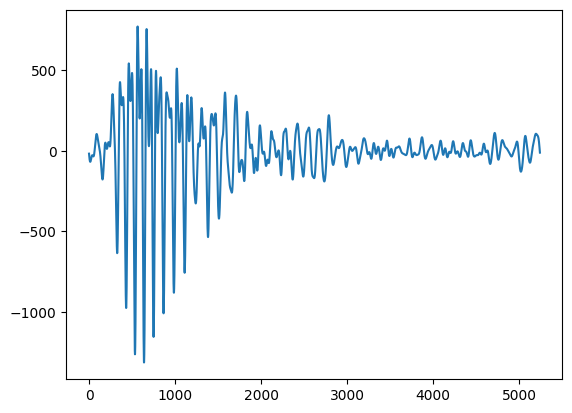

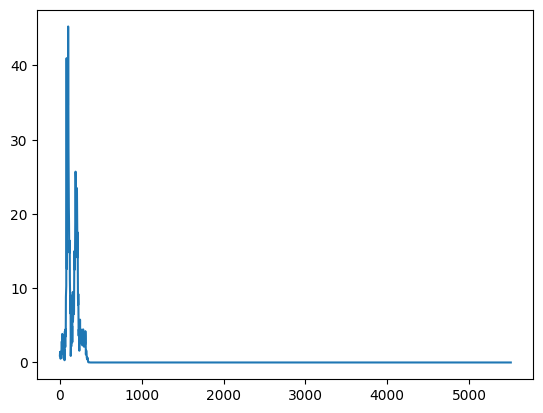

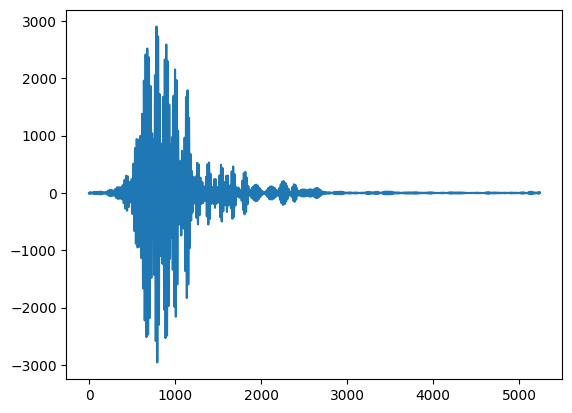

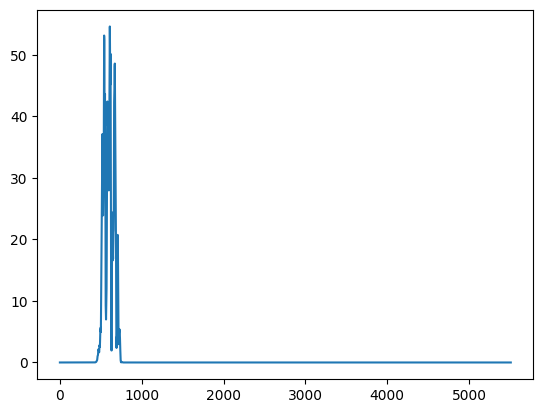

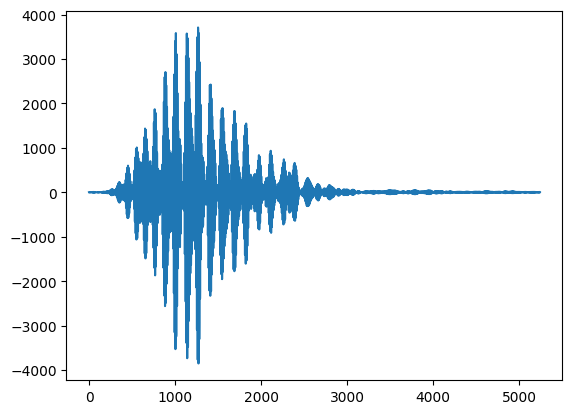

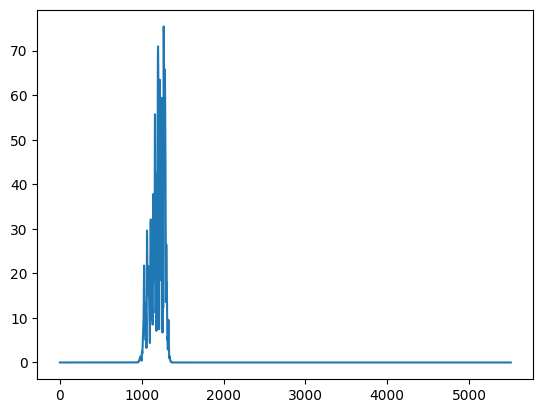

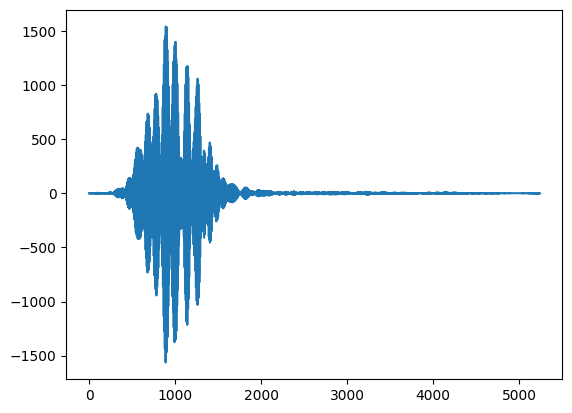

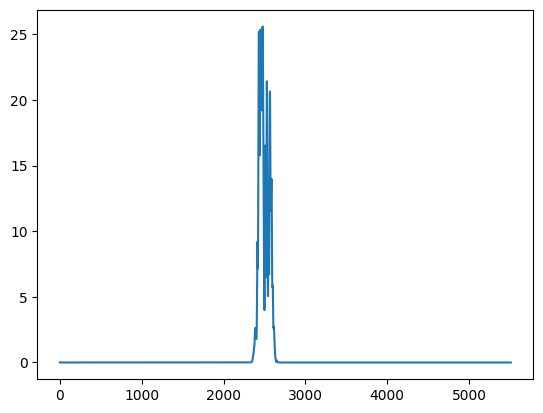

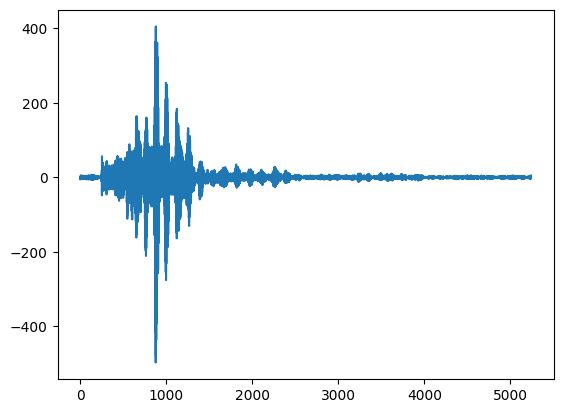

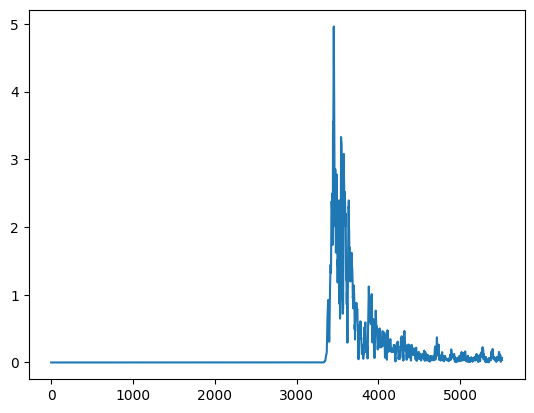

In [ ]:
data = second
m = 254

lpf_1 = processor.reflect_lpf(processor.lpf(300, dt, m))
bpf_2 = processor.bpf(500, 700, dt, m)
bpf_3 = processor.bpf(1000, 1300, dt, m)
bpf_4 = processor.bpf(2400, 2600, dt, m)
hpf_5 = processor.hpf(3400, dt, m)

convol_lpf_1 = model.convolModel(data, len(data), lpf_1, 2*m+1)
convol_hpf_5 = model.convolModel(data, len(data), hpf_5, 2*m+1)
convol_bpf_2 = model.convolModel(data, len(data), bpf_2, 2*m+1)
convol_bpf_3 = model.convolModel(data, len(data), bpf_3, 2*m+1)
convol_bpf_4 = model.convolModel(data, len(data), bpf_4, 2*m+1)


convol_lpf_amp_1 = analyzer.fourier(convol_lpf_1, len(convol_lpf_1))[2]
convol_hpf_amp_5 = analyzer.fourier(convol_hpf_5, len(convol_hpf_5))[2]
convol_bpf_amp_2 = analyzer.fourier(convol_bpf_2, len(convol_bpf_2))[2]
convol_bpf_amp_3 = analyzer.fourier(convol_bpf_3, len(convol_bpf_3))[2]
convol_bpf_amp_4 = analyzer.fourier(convol_bpf_4, len(convol_bpf_4))[2]




plt.plot(convol_lpf_1, c='tab:blue')
plt.show()

plt.plot(*analyzer.spectre_f(convol_lpf_amp_1, dt), c='tab:blue')
plt.show()



plt.plot(convol_bpf_2, c='tab:blue')
plt.show()
plt.plot(*analyzer.spectre_f(convol_bpf_amp_2, dt), c='tab:blue')
plt.show()

plt.plot(convol_bpf_3, c='tab:blue')
plt.show()
plt.plot(*analyzer.spectre_f(convol_bpf_amp_3, dt), c='tab:blue')
plt.show()


plt.plot(convol_bpf_4, c='tab:blue')
plt.show()
plt.plot(*analyzer.spectre_f(convol_bpf_amp_4, dt), c='tab:blue')
plt.show()



plt.plot(convol_hpf_5, c='tab:blue')
plt.show()
plt.plot(*analyzer.spectre_f(convol_hpf_amp_5, dt), c='tab:blue')
plt.show()

In [ ]:
inout.write_wav('data/'  + 'w21.wav', np.array(convol_lpf_1, dtype=np.int16), rate)

inout.write_wav('data/'  + 'w25.wav', np.array(convol_hpf_5, dtype=np.int16), rate)

inout.write_wav('data/'  + 'w22.wav', np.array(convol_bpf_2, dtype=np.int16), rate)

inout.write_wav('data/'  + 'w23.wav', np.array(convol_bpf_3, dtype=np.int16), rate)

inout.write_wav('data/'  + 'w24.wav', np.array(convol_bpf_4, dtype=np.int16), rate)